## The Kaldor Facts

This file presents three Kaldor facts that can be easily plotted from the data: Growth rates, the capital-output ratio and the labor income share.

C:\Users\qwp970\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


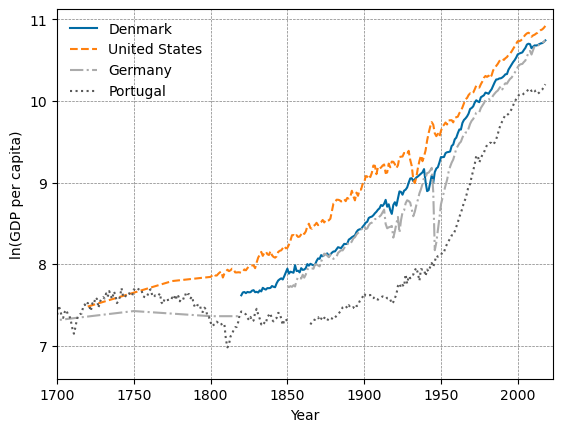

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Nicer color template
plt.style.use('tableau-colorblind10')
lines = ["-","--","-.",":","-","--","-.",":"]

maddison = pd.read_excel('mpd2020.xlsx',sheet_name = 'Full data')
maddison['gdppc'] =  np.log(maddison['gdppc'])

countrylist = ('Denmark','United States','Germany','Portugal') #List of countries to be plotted

ll=0
for country in countrylist:
    temp = maddison.loc[maddison['country'] == country] #Unemployment rate for individuals aged 25-74

    plt.plot(temp.year,temp.gdppc, label = country, linestyle = lines[ll])
    ll+=1
    
    
plt.legend(frameon=False,loc = 'upper left')
plt.xlim(1700,2023)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('ln(GDP per capita)')
plt.xlabel('Year')
plt.savefig('lr_growth.pdf')

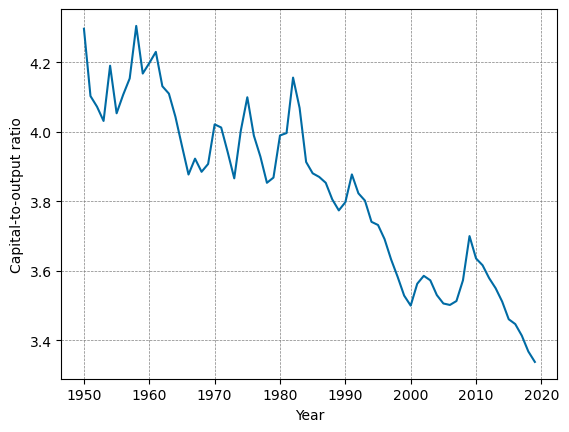

In [20]:
from fredapi import Fred #need to install this
fred = Fred(api_key='c0a963cd5bd17449f6d4b6a4e8d18f14')
us_k = fred.get_series('RKNANPUSA666NRUG') #Capital stock, constant prices
us_y = fred.get_series('GDPCA') #GDP

ky_ratio = (us_k/1000)/us_y #Capital stock is in millions, gdp in billions
plt.plot(ky_ratio)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Capital-to-output ratio')
plt.xlabel('Year')
plt.savefig('ky_ratio_US.pdf')

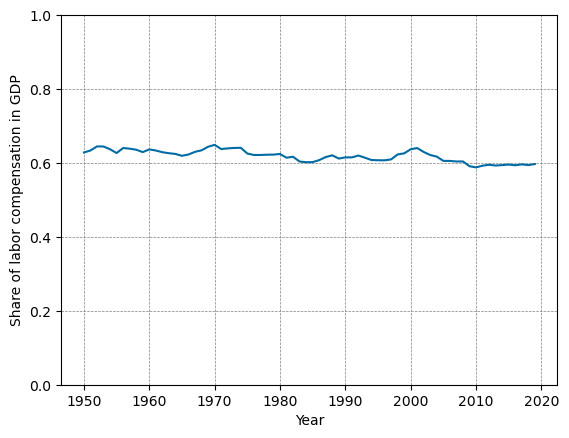

In [19]:
## The labor income share
us_lis = fred.get_series('LABSHPUSA156NRUG') #GDP

plt.plot(us_lis)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(0,1)
plt.ylabel('Share of labor compensation in GDP')
plt.xlabel('Year')
plt.savefig('Labincshare_US.pdf')